# Tutorial 13: Riskfolio-Lib and Xlwings

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1954%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2410%,1.3734%,-1.0857%
2016-01-06,-11.4864%,-1.5878%,0.2411%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5646%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9034%,-2.9145%
2016-01-07,-5.1388%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2206%,-0.8856%,-4.6059%,-2.5394%,...,-2.2066%,-3.0309%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2736%,-2.2705%,-1.6036%,-2.5425%,0.1099%,-0.2241%,0.5706%,-1.6402%,-1.7642%,-0.1649%,...,-0.1538%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3838%,-0.1117%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3384%,0.1693%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5674%,0.5287%,0.6616%,0.0331%,...,1.6436%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5799%,-1.9919%


## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.1590%,11.5019%,0.0000%,0.0000%,8.4806%,0.0000%,3.8193%,0.0000%,0.0000%,...,10.8263%,0.0000%,0.0000%,0.0000%,0.0000%,7.1804%,0.0000%,0.0000%,4.2740%,0.0000%


### 2.2 Plotting portfolio composition

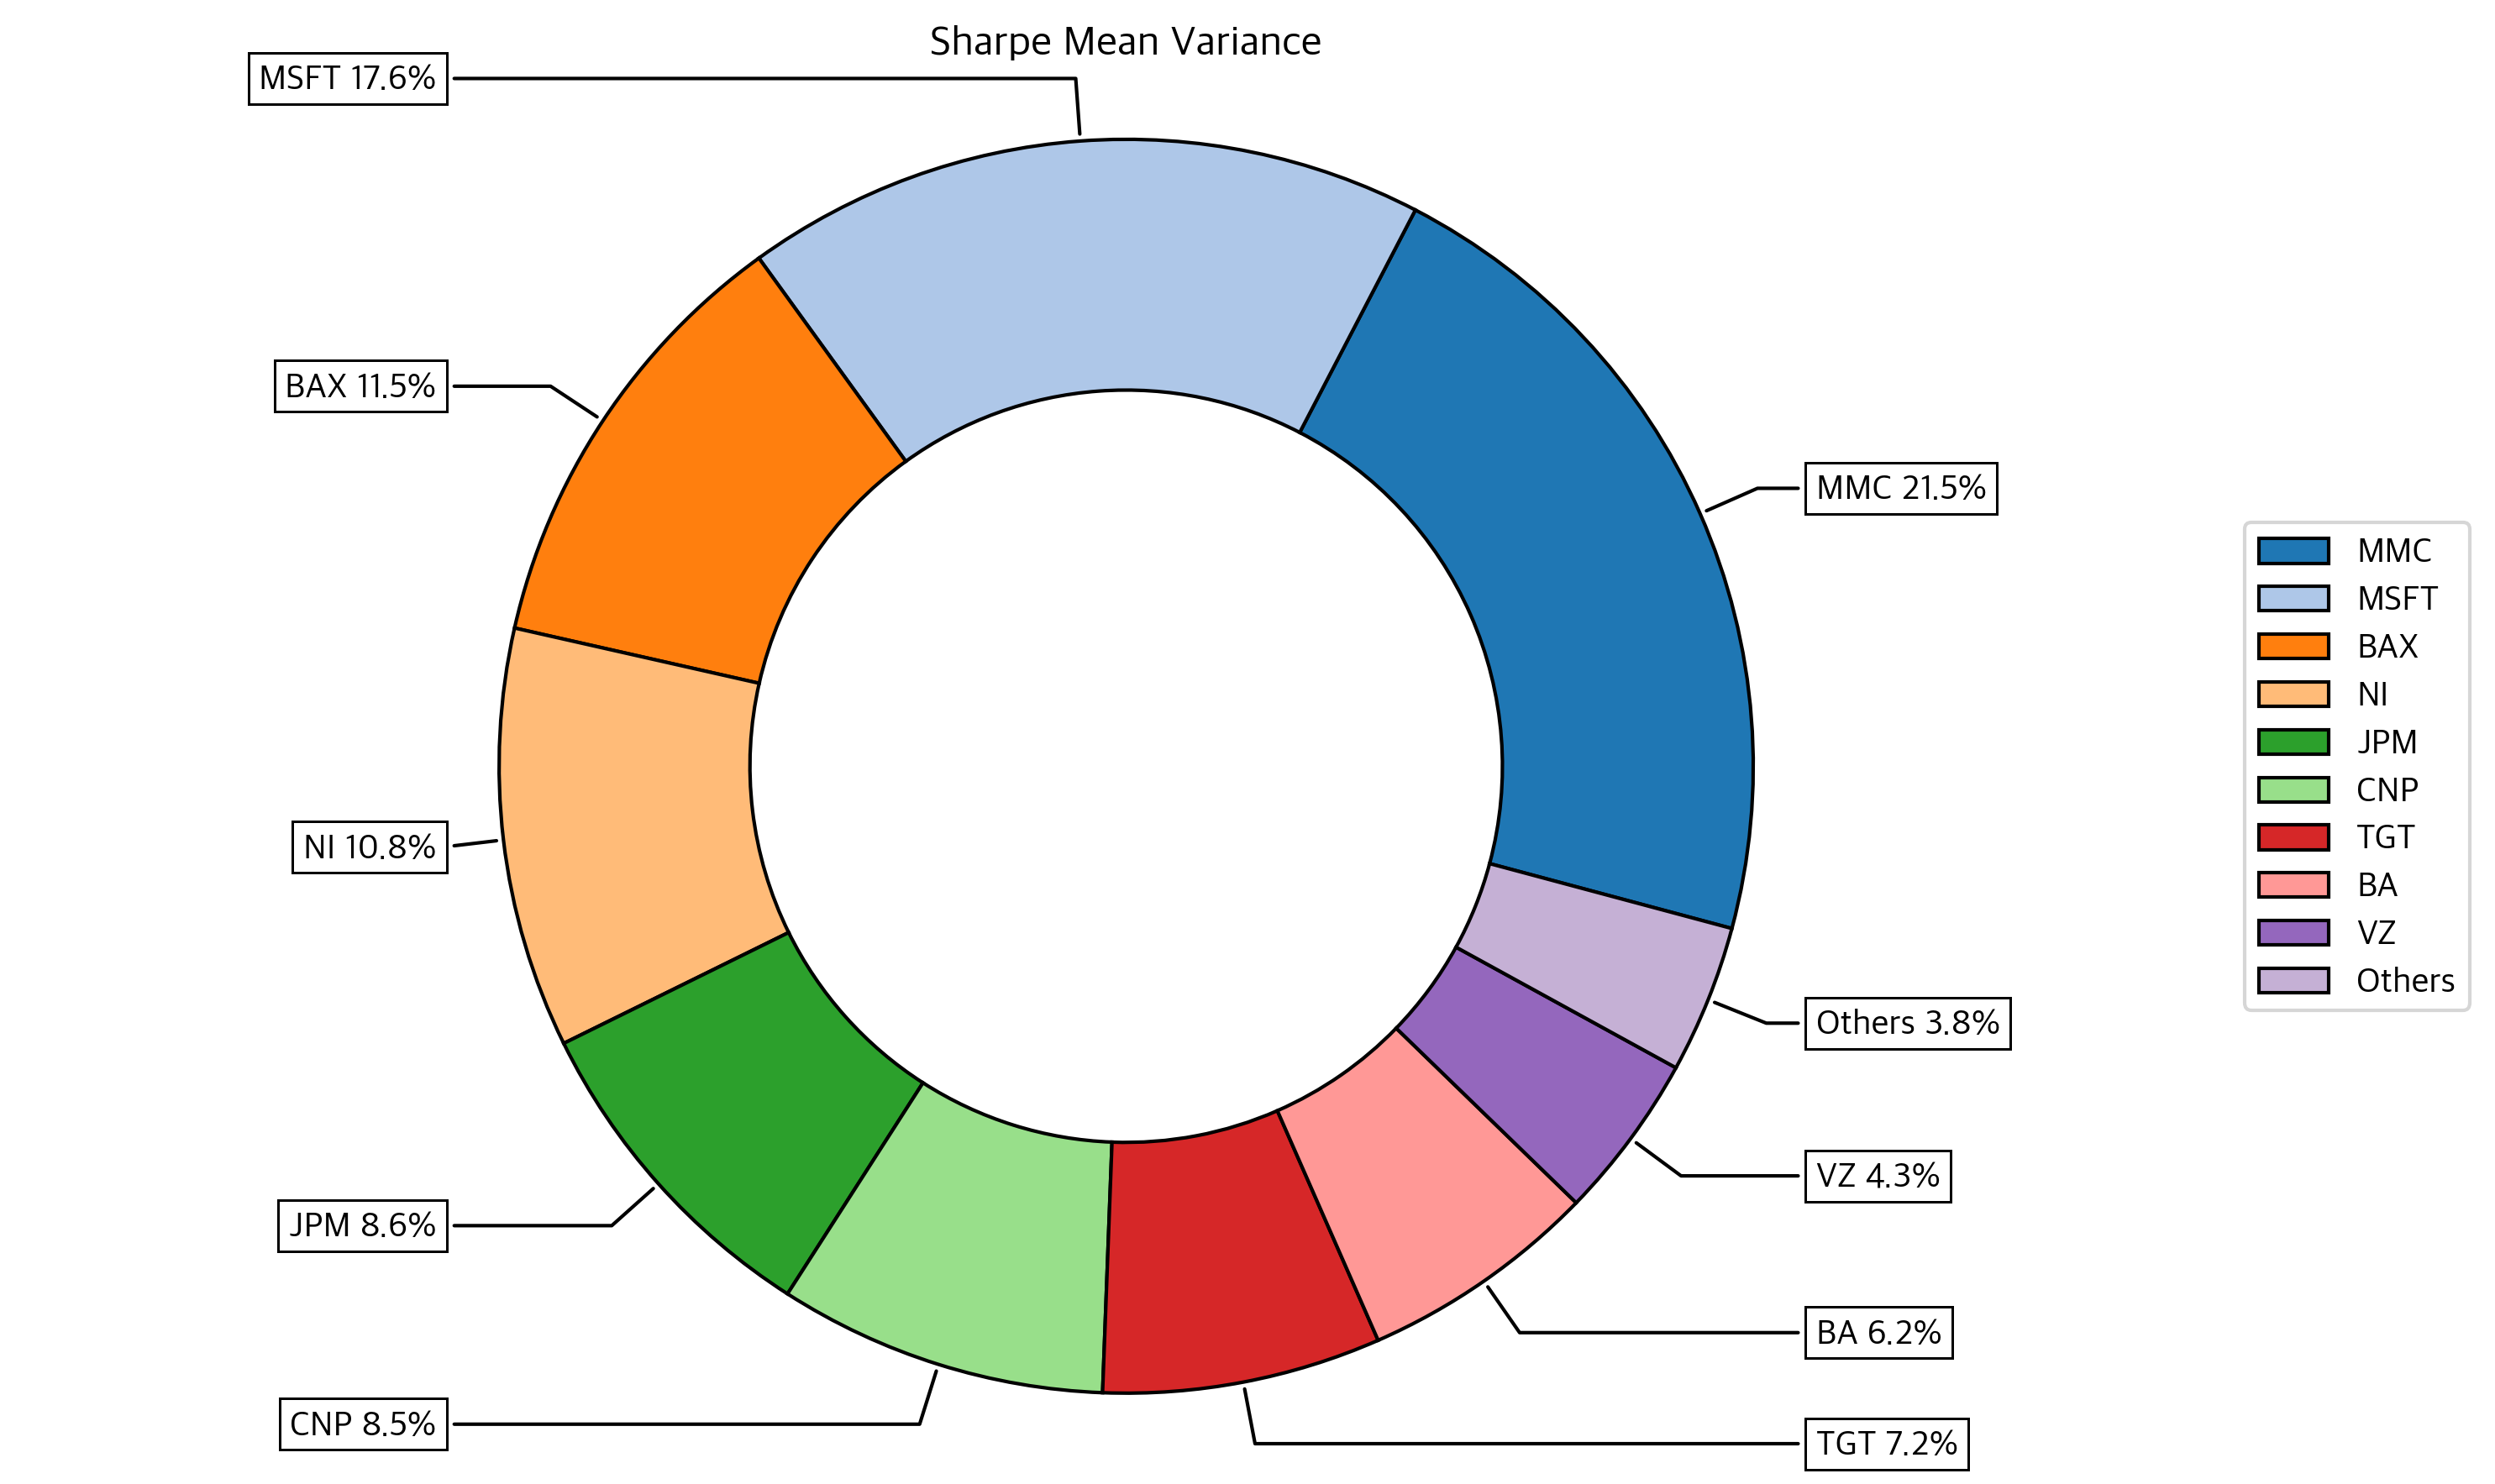

In [4]:
import matplotlib.pyplot as plt

# Plotting the composition of the portfolio

fig_1, ax_1 = plt.subplots(figsize=(10,6))

ax_1 = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                   height=6, width=10, ax=ax_1)

### 2.3 Calculate efficient frontier

In [5]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,5.2377%,4.3880%,2.1296%,6.9905%,3.2270%,0.0742%,0.0000%,2.8446%,...,11.4529%,0.0000%,14.9247%,0.1682%,6.5903%,4.0899%,0.0000%,0.0000%,8.2767%,0.0000%
1,0.0000%,2.0125%,8.4903%,0.7981%,1.6844%,8.5599%,2.1529%,1.3613%,0.0000%,1.0444%,...,13.4496%,0.0000%,9.2100%,0.0000%,5.5816%,5.5235%,0.0000%,0.0000%,8.7591%,0.0000%
2,0.0000%,2.8165%,9.3712%,0.0000%,1.1980%,9.1476%,1.7065%,1.7396%,0.0000%,0.0871%,...,14.2327%,0.0000%,6.4848%,0.0000%,5.1003%,6.0539%,0.0000%,0.0000%,9.0040%,0.0000%
3,0.0000%,3.4305%,9.9329%,0.0000%,0.5693%,9.5578%,1.0811%,1.9316%,0.0000%,0.0000%,...,14.7707%,0.0000%,3.6631%,0.0000%,4.2579%,6.4249%,0.0000%,0.0000%,9.2132%,0.0000%
4,0.0000%,3.9342%,10.3865%,0.0000%,0.0003%,9.8874%,0.3998%,2.0811%,0.0000%,0.0000%,...,15.1319%,0.0000%,1.0859%,0.0000%,3.3464%,6.7108%,0.0000%,0.0000%,9.2765%,0.0000%


<Axes: title={'center': 'Efficient Frontier Mean - Standard Deviation (MV)'}, xlabel='Expected Risk - Standard Deviation (MV)', ylabel='Expected Arithmetic Return'>

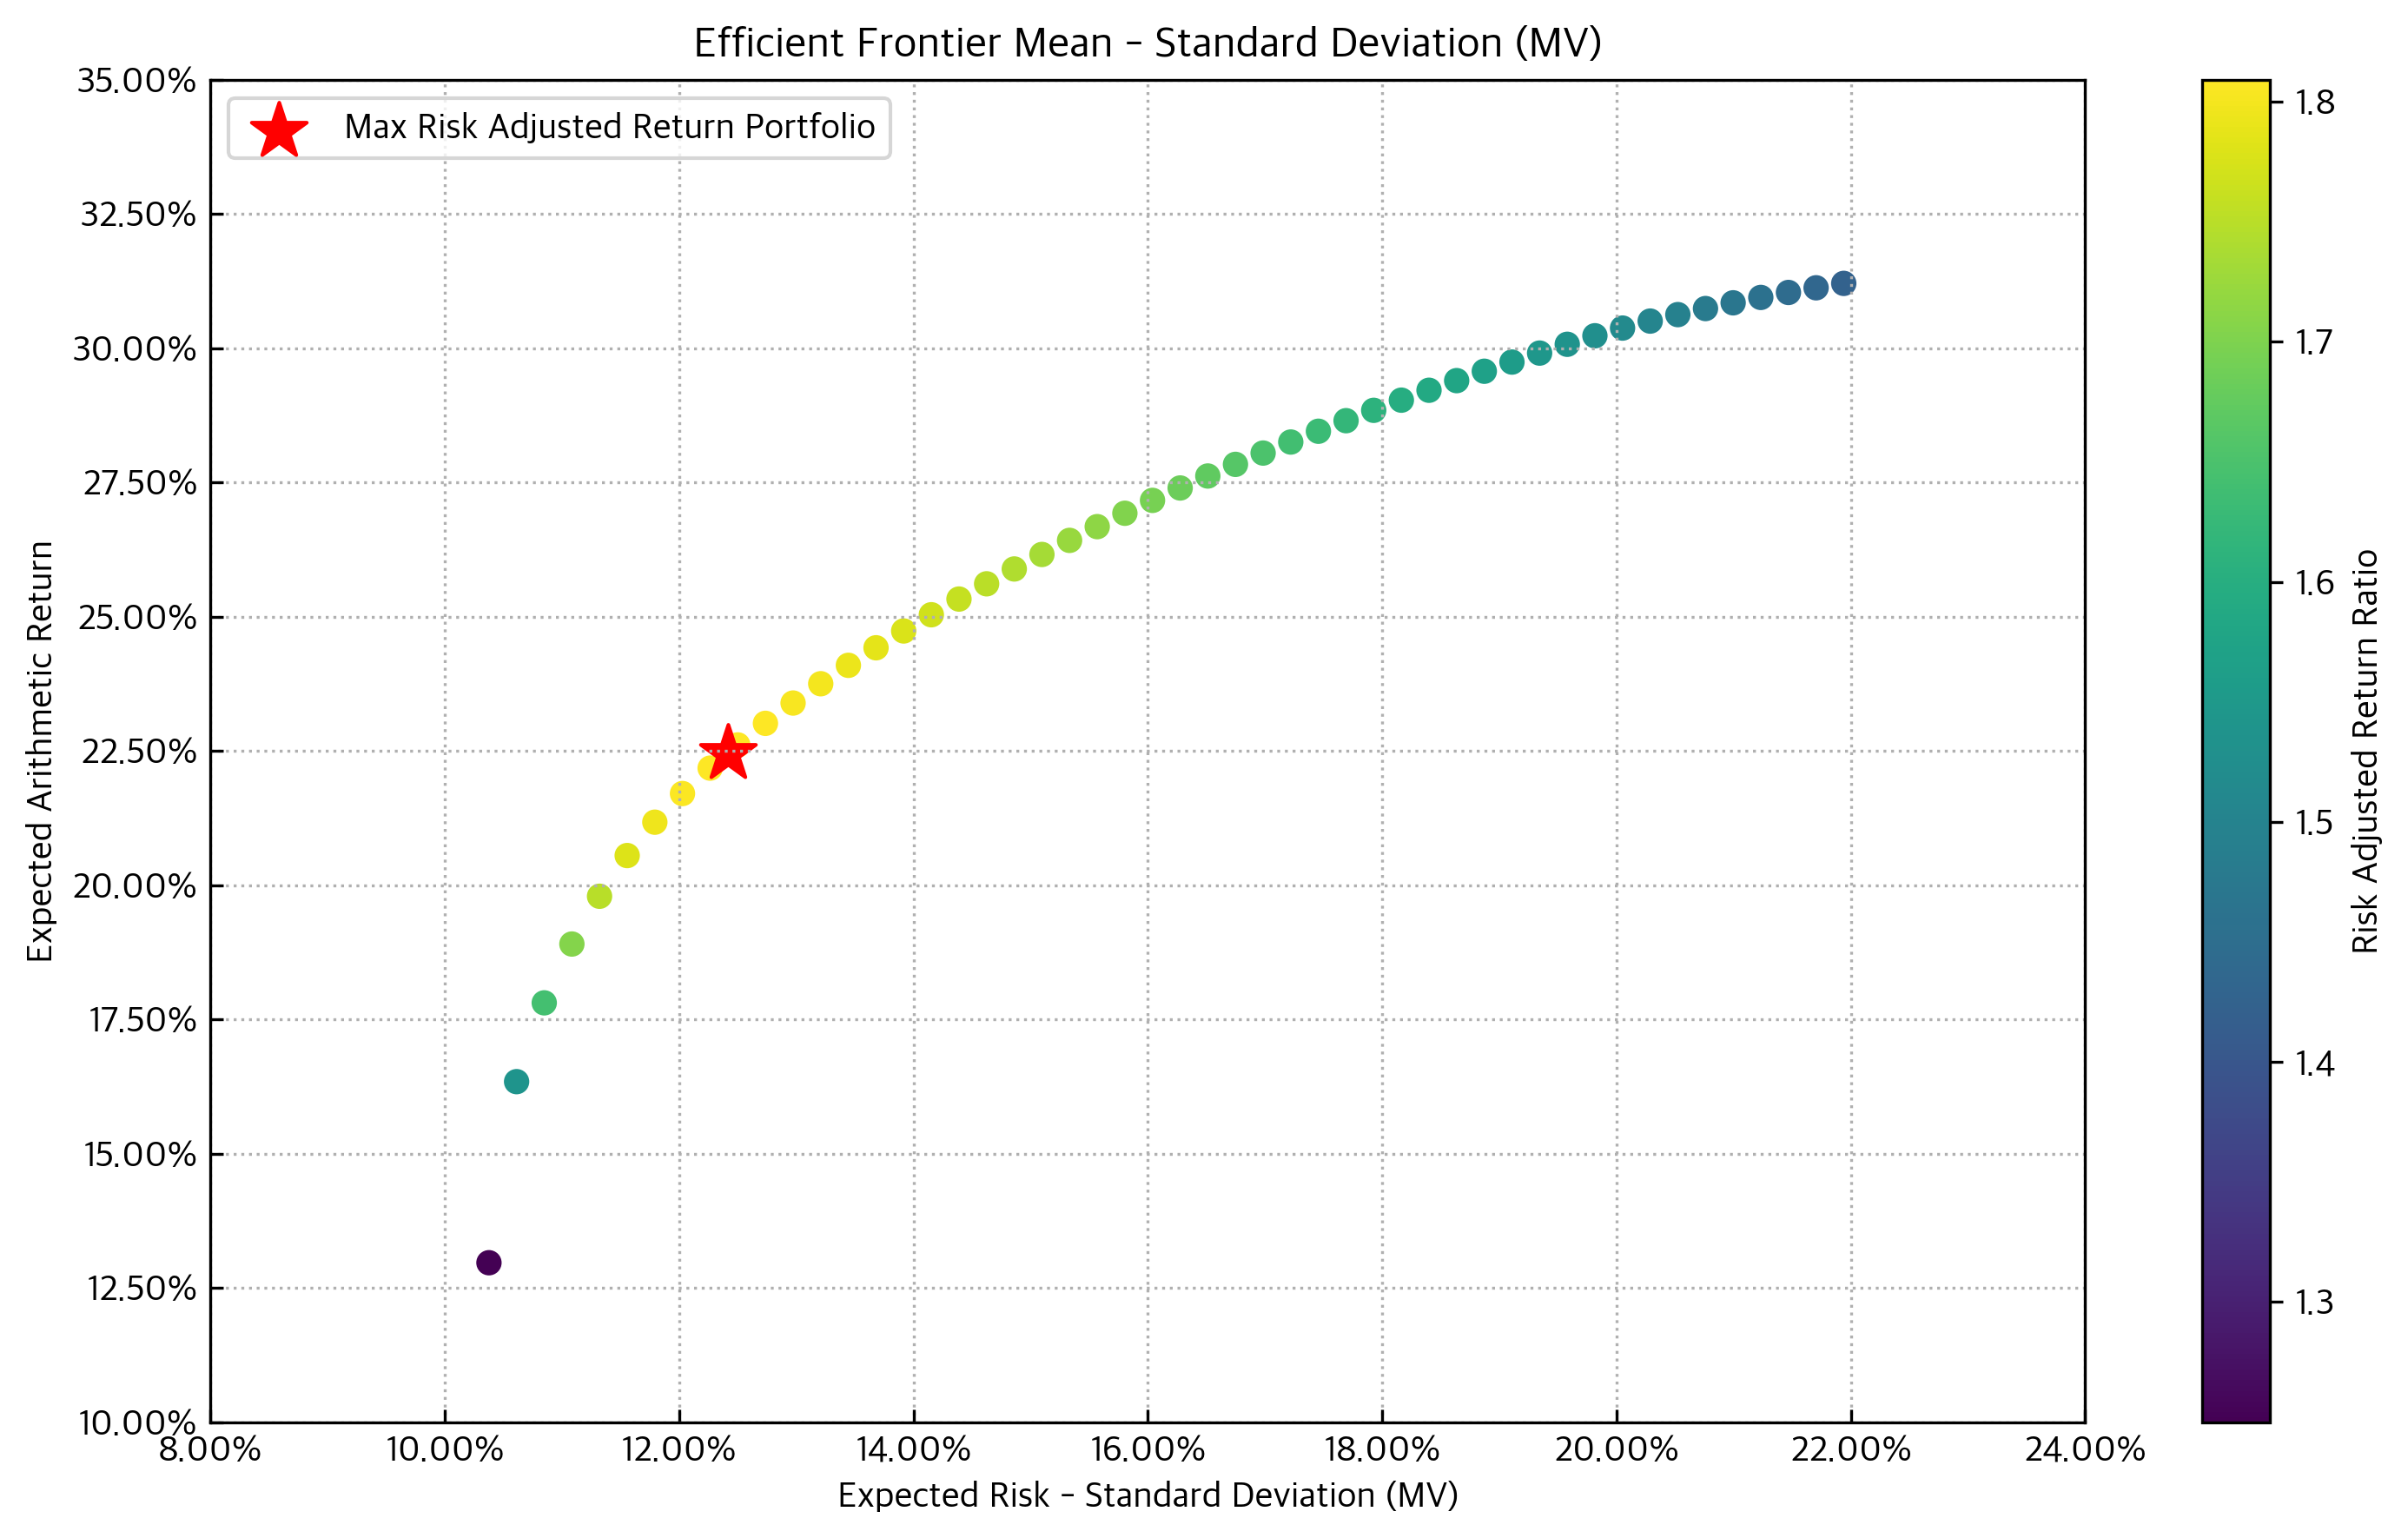

In [6]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

fig_2, ax_2 = plt.subplots(figsize=(10,6))

rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                 rf=rf, alpha=0.01, cmap='viridis', w=w, label=label,
                 marker='*', s=16, c='r', height=6, width=10, ax=ax_2)

<Axes: title={'center': "Efficient Frontier's Assets Structure"}>

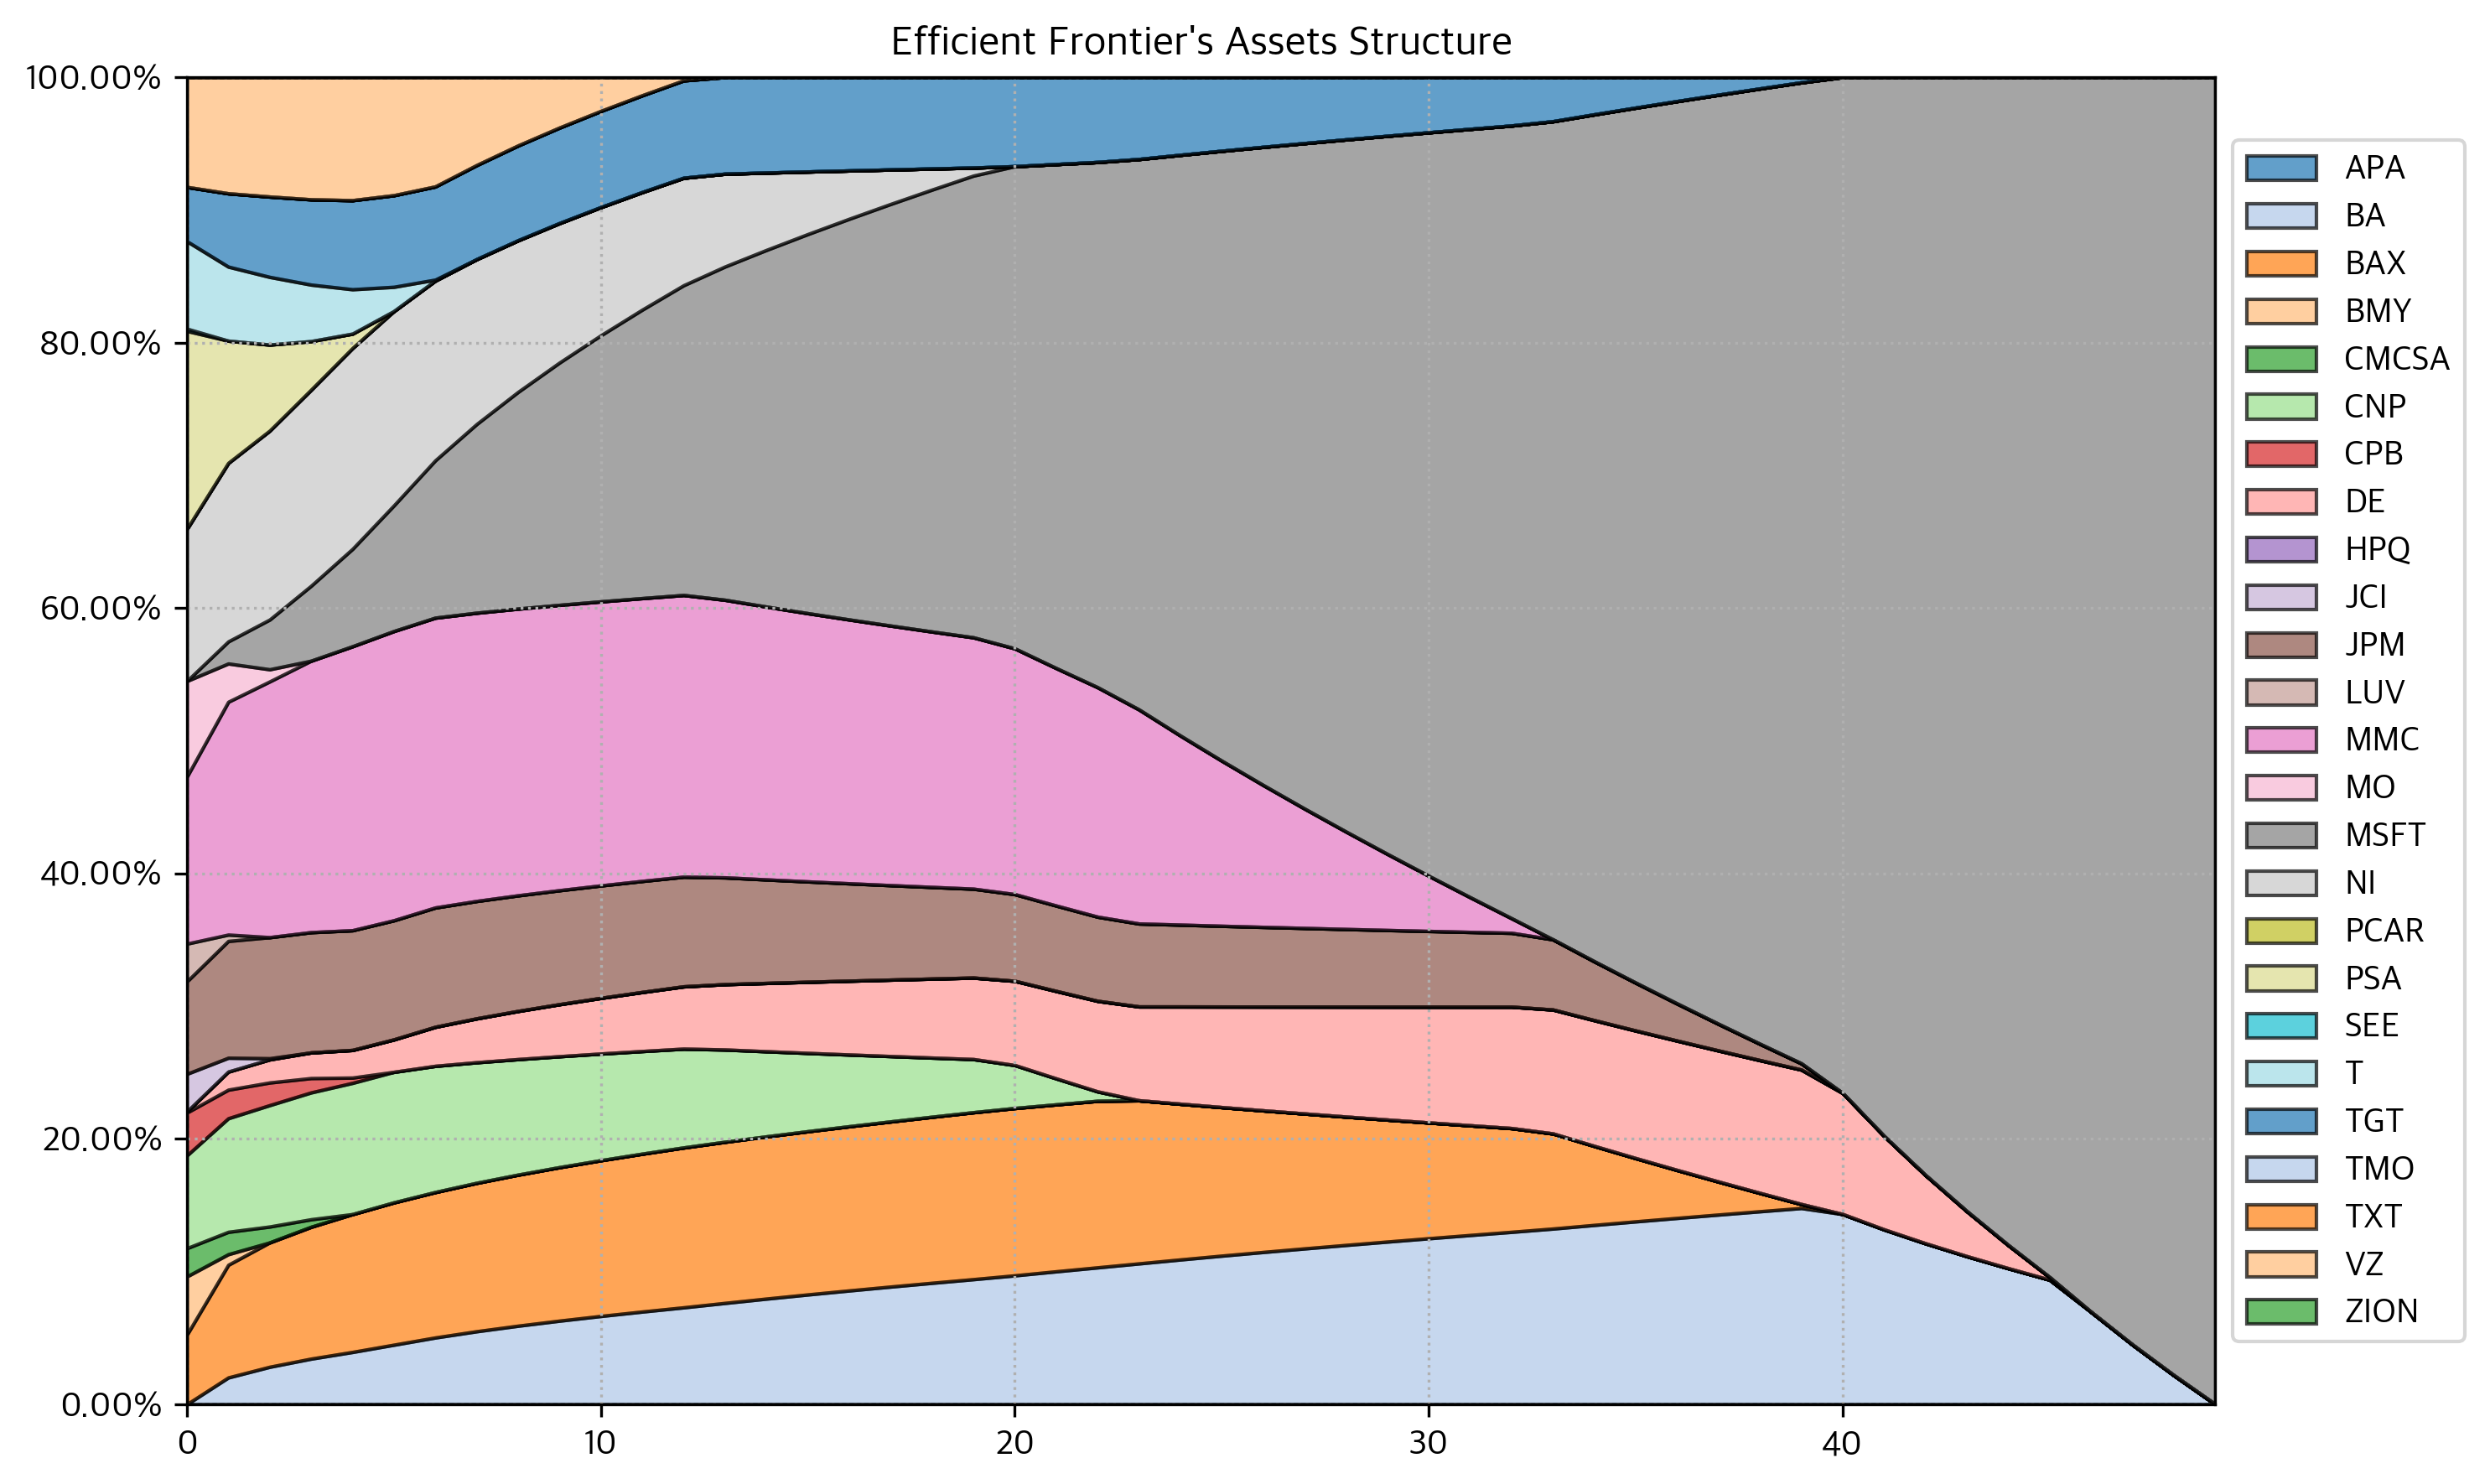

In [7]:
# Plotting efficient frontier composition

fig_3, ax_3 = plt.subplots(figsize=(10,6))

rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=ax_3)

## 3. Combining Riskfolio-Lib and Xlwings

### 3.1 Creating an Empty Excel Workbook

In [9]:
import xlwings as xw

# Creating an empty Excel Workbook

wb = xw.Book()  
sheet1 = wb.sheets[0]
sheet1.name = 'Charts'
sheet2 = wb.sheets.add('Frontier')
sheet3 = wb.sheets.add('Optimal Weights')

### 3.2 Adding Pictures to Sheet 1

In [10]:
sheet1.pictures.add(fig_1, name = "Weights",
                    update = True, 
                    top = sheet1.range("A1").top,
                    left = sheet1.range("A1").left)

sheet1.pictures.add(fig_2, name = "Frontier",
                    update = True, 
                    top = sheet1.range("M1").top,
                    left = sheet1.range("M1").left)

sheet1.pictures.add(fig_3, name = "Composition",
                    update = True, 
                    top = sheet1.range("A30").top,
                    left = sheet1.range("A30").left)

<Picture 'Composition' in <Sheet [통합 문서1]Charts>>

### 3.2 Adding Data to Sheet 2 and Sheet 3

In [11]:
# Writing the weights of the frontier in the Excel Workbook

sheet2.range('A1').value = frontier.applymap('{:.6%}'.format)

# Writing the optimal weights in the Excel Workbook

sheet3.range('A1').value = w.applymap('{:.6%}'.format)